# Måle inn punkt med GNSS
Vi skal måle gjennomsnitt på de forskjellige måtene vi har samlet inn data. Vi har en KML fil med data fra RTK'n, og et datasett fra telefon. Importerer først pakker vi trenger for å behandle dataen.

In [39]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import pyproj

## Gjennomsnitt ved RTK målinger
Først får vi ut koordinatene fra KML filen og lagrer det i et array.

In [40]:
def extract_coordinates_kml_RTK (kml_file):
    tree = ET.parse(kml_file)
    root = tree.getroot()
    
    # Namespace er noe vi må ha med siden det ikke er en XML fil
    namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

    # Går igjennom alle punktene - må her også ha spesielt format pga kml-fil

    coordinates = []

    for placemark in root.findall('.//kml:Placemark', namespace):
            longitude = placemark.find('.//kml:SimpleData[@name="Longitude"]', namespace).text
            latitude = placemark.find('.//kml:SimpleData[@name="Latitude"]', namespace).text
            coordinates.append([float(longitude), float(latitude)])
    return coordinates

extract_coordinates_kml_RTK('RTK.kml')

[[10.77530275, 59.66589043],
 [10.77530274, 59.66589059],
 [10.7753027, 59.6658904],
 [10.77530269, 59.66589036],
 [10.77530294, 59.6658903],
 [10.77530266, 59.66589073],
 [10.77530263, 59.66589051]]

Så lager vi en funkjson for å beregne gjennomsnitt:

In [41]:

def average_coordinates(array_input):
    coordinates = np.array(array_input)

    # Må ha axis=0 slik at funksjonen ikke regner ut gjennomsnittet av alle punktene
    average_coordinates_point = np.mean(coordinates, axis=0)
    print('Gjennomsnittskoordinatet er:', average_coordinates_point)


Kjører denne funksjonen på punktene målt med RTK.

In [42]:
average_coordinates(extract_coordinates_kml_RTK('RTK.kml'))

Gjennomsnittskoordinatet er: [10.77530273 59.66589047]


## Gjennomsnitt ved mobil

Her har vi to ulike måter. Filen vi fikk fra Trygve i tilfelle NMEA dataen viser seg trøblete

### Trygves data

Trekker så ut punktene fra KML filen fra Trygves mobil, og lager ett array av de. Funksjonen blir veldig lik den forrige funksjonen, men med små endringer (Bryter litt med DNRY)

In [43]:
def extract_coordinates_kml_mobil (kml_file):
    tree = ET.parse(kml_file)
    root = tree.getroot()

    # Må bruke http://www.google.com/kml/ext/2.2 her i stedet for klm, siden gx:coord er google spesifik .klm
    namespace = {'gx': 'http://www.google.com/kml/ext/2.2'}

    coordinates = []
    for coord in root.findall('.//gx:coord', namespace):
        #understreken her var kul
        lon, lat, _ = map(float, coord.text.split())
        coordinates.append([lon, lat])

    print(coordinates)
    return coordinates

Kjører så gjennomsnittsfunksjonen for å finne ut gjennomsnittet ved disse målingene

In [44]:
average_coordinates(extract_coordinates_kml_mobil('trygve_data.kml'))

[[10.77534758, 59.6658596], [10.77534752, 59.66585965], [10.77534754, 59.66585969], [10.7753473, 59.66585998], [10.77534701, 59.66586022], [10.77534677, 59.66586042], [10.77534493, 59.6658676], [10.77534747, 59.66588249], [10.77534739, 59.66588243], [10.77534724, 59.66588247], [10.77534714, 59.6658825], [10.77534697, 59.66588246], [10.77534678, 59.66588248], [10.77534642, 59.66588247], [10.77534624, 59.66588246], [10.77534611, 59.66588243], [10.77534626, 59.66588244], [10.77534627, 59.66588232], [10.77534595, 59.66588243], [10.7753381, 59.66588568], [10.77533797, 59.66588562], [10.77535342, 59.66586349], [10.7753535, 59.66586693], [10.77536424, 59.66586961], [10.77537427, 59.66588664], [10.77536811, 59.66588881], [10.77535985, 59.66587819], [10.77535872, 59.6658773], [10.77534108, 59.66588137], [10.77534092, 59.66588135], [10.77534095, 59.66588155], [10.77531244, 59.66584831], [10.77531157, 59.66584944], [10.77531128, 59.66584972], [10.77531066, 59.66584985], [10.77531042, 59.66585006]

## Scatter plot over dataen

Tror dette kan være kult å ha med i rapporten.

[[10.77534758, 59.6658596], [10.77534752, 59.66585965], [10.77534754, 59.66585969], [10.7753473, 59.66585998], [10.77534701, 59.66586022], [10.77534677, 59.66586042], [10.77534493, 59.6658676], [10.77534747, 59.66588249], [10.77534739, 59.66588243], [10.77534724, 59.66588247], [10.77534714, 59.6658825], [10.77534697, 59.66588246], [10.77534678, 59.66588248], [10.77534642, 59.66588247], [10.77534624, 59.66588246], [10.77534611, 59.66588243], [10.77534626, 59.66588244], [10.77534627, 59.66588232], [10.77534595, 59.66588243], [10.7753381, 59.66588568], [10.77533797, 59.66588562], [10.77535342, 59.66586349], [10.7753535, 59.66586693], [10.77536424, 59.66586961], [10.77537427, 59.66588664], [10.77536811, 59.66588881], [10.77535985, 59.66587819], [10.77535872, 59.6658773], [10.77534108, 59.66588137], [10.77534092, 59.66588135], [10.77534095, 59.66588155], [10.77531244, 59.66584831], [10.77531157, 59.66584944], [10.77531128, 59.66584972], [10.77531066, 59.66584985], [10.77531042, 59.66585006]

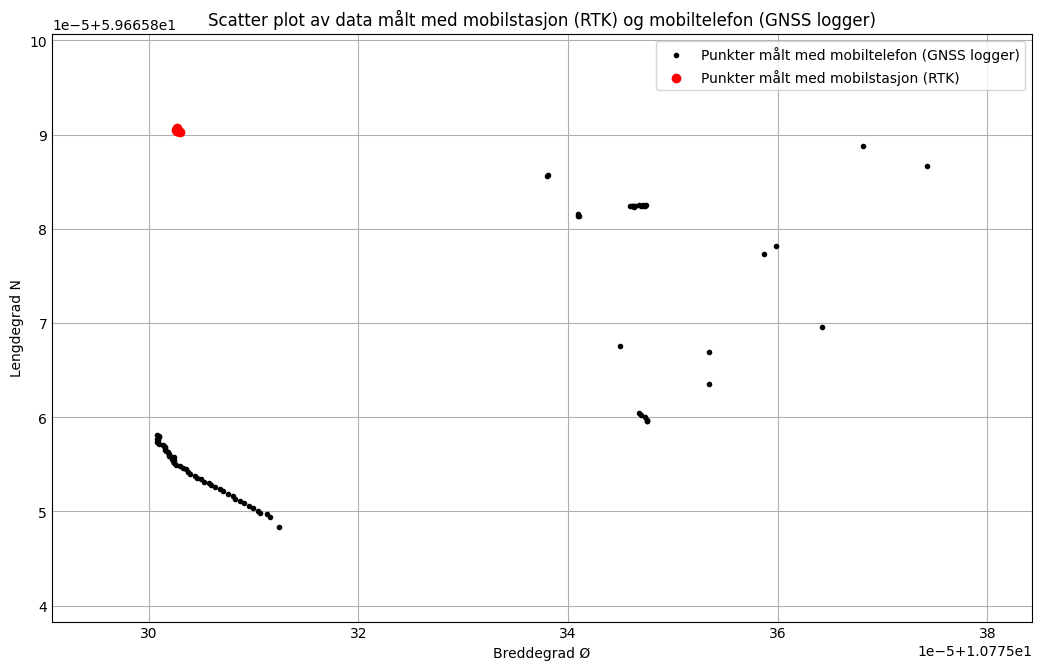

In [64]:
mobile_coordinates = extract_coordinates_kml_mobil('trygve_data.kml')
rtk_coordinates = extract_coordinates_kml_RTK('RTK.kml')

# Bruker zip funksjonen for å få (x, y) koordinater
long_mob, lat_mob = zip(*mobile_coordinates)
long_rtk, lat_rtk = zip(*rtk_coordinates)

plt.figure(figsize=(10, 6))

# En variabel for å endre hvor mye rom det er rundt punktene i plottet
space_value = 0.00001

# Justere aksene(?) i forhold til dataen
plt.xlim(min(min(long_mob), min(long_rtk)) - space_value, max(max(long_mob), max(long_rtk)) + space_value)
plt.ylim(min(min(lat_mob), min(lat_rtk)) - space_value, max(max(lat_mob), max(lat_rtk)) + space_value)


plt.scatter(long_mob, lat_mob, c='black', marker='.', label='Punkter målt med mobiltelefon (GNSS logger)')
plt.scatter(long_rtk, lat_rtk, c='red', marker='o', label='Punkter målt med mobilstasjon (RTK)')

# Adding title and labels
plt.title('Scatter plot av data målt med mobilstasjon (RTK) og mobiltelefon (GNSS logger)')
plt.xlabel('Breddegrad Ø')
plt.ylabel('Lengdegrad N')


# Optional: Add grid
plt.grid(True)

# Display the plot with a legend
plt.legend()
plt.show()


Ser her at enhetene på aksene blir helt ville når man somer inn så mye. Gir derfor mye mer mening å bruke UTM 32, som det forsåvidt ble brukt i oppgaveteksten. Lager derfor en funksjon som konverterer fra grader til UTM 32 koordinater. Finner ut av det er et bibliotek som heter `pyproj` som hjelper med dette.

In [65]:
# Brukte chatGPT til å hjelpe til med konverteringen

def convert_to_utm32(coord_pairs):
    # Define the UTM32 (Zone 32N) projection -- Blir dette riktig? Får sjekke mot faktisk koordinat 
    utm_proj = pyproj.Proj(proj='utm', zone=32, ellps='WGS84', south=False)

    # Convert the coordinates and return the combined UTM coordinates
    return list(zip(*utm_proj(*zip(*coord_pairs))))

Plotter så dataen på nytt med UTM32 koordinater

[[10.77534758, 59.6658596], [10.77534752, 59.66585965], [10.77534754, 59.66585969], [10.7753473, 59.66585998], [10.77534701, 59.66586022], [10.77534677, 59.66586042], [10.77534493, 59.6658676], [10.77534747, 59.66588249], [10.77534739, 59.66588243], [10.77534724, 59.66588247], [10.77534714, 59.6658825], [10.77534697, 59.66588246], [10.77534678, 59.66588248], [10.77534642, 59.66588247], [10.77534624, 59.66588246], [10.77534611, 59.66588243], [10.77534626, 59.66588244], [10.77534627, 59.66588232], [10.77534595, 59.66588243], [10.7753381, 59.66588568], [10.77533797, 59.66588562], [10.77535342, 59.66586349], [10.7753535, 59.66586693], [10.77536424, 59.66586961], [10.77537427, 59.66588664], [10.77536811, 59.66588881], [10.77535985, 59.66587819], [10.77535872, 59.6658773], [10.77534108, 59.66588137], [10.77534092, 59.66588135], [10.77534095, 59.66588155], [10.77531244, 59.66584831], [10.77531157, 59.66584944], [10.77531128, 59.66584972], [10.77531066, 59.66584985], [10.77531042, 59.66585006]

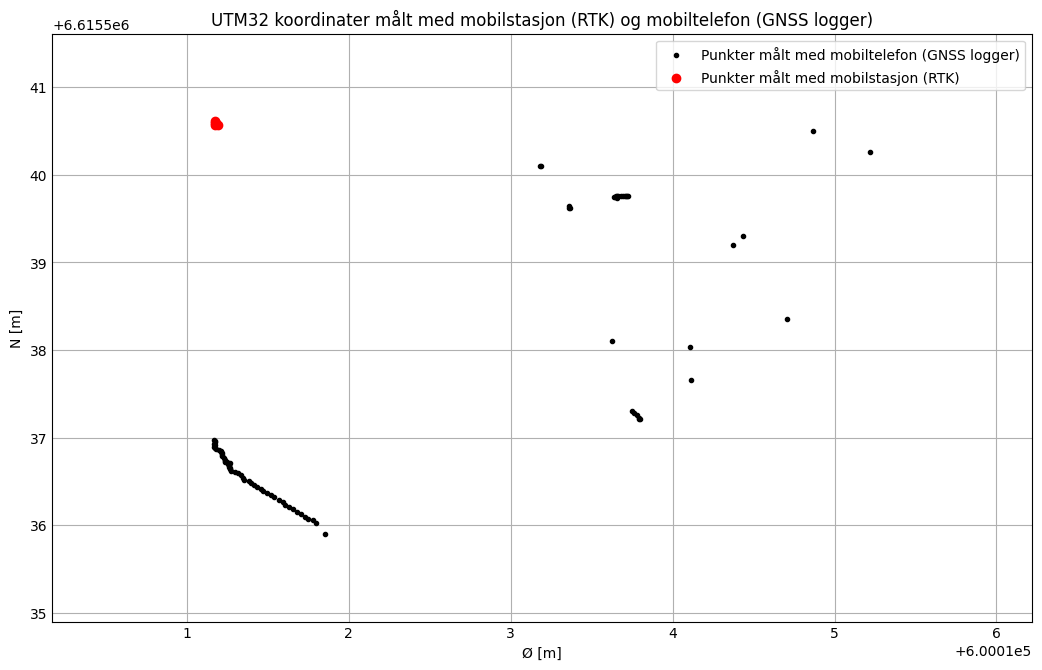

In [75]:
mobile_coordinates = convert_to_utm32(extract_coordinates_kml_mobil('trygve_data.kml'))
rtk_coordinates = convert_to_utm32(extract_coordinates_kml_RTK('RTK.kml'))

print(mobile_coordinates)

# Bruker zip funksjonen for å få (x, y) koordinater
long_mob, lat_mob = zip(*mobile_coordinates)
long_rtk, lat_rtk = zip(*rtk_coordinates)

plt.figure(figsize=(10, 6))

# En variabel for å endre hvor mye rom det er rundt punktene i plottet
space_value = 1

# Justere aksene(?) i forhold til dataen
plt.xlim(min(min(long_mob), min(long_rtk)) - space_value, max(max(long_mob), max(long_rtk)) + space_value)
plt.ylim(min(min(lat_mob), min(lat_rtk)) - space_value, max(max(lat_mob), max(lat_rtk)) + space_value)


plt.scatter(long_mob, lat_mob, c='black', marker='.', label='Punkter målt med mobiltelefon (GNSS logger)')
plt.scatter(long_rtk, lat_rtk, c='red', marker='o', label='Punkter målt med mobilstasjon (RTK)')

# Adding title and labels
plt.title('UTM32 koordinater målt med mobilstasjon (RTK) og mobiltelefon (GNSS logger)')
plt.xlabel('Ø [m]')
plt.ylabel('N [m]')

# Optional: Add grid
plt.grid(True)

# Display the plot with a legend
plt.legend()
plt.show()

Innser helt på slutten at jeg ikke har tenkt på høydeverdi i hele tatt.. Kan vurdere å skrive om dette på et senere punkt.

Tester .nmea fil (tenker å samle inn data pånytt i morgen).

All den møkka under kan jeg erstatte med å laste ned gpsbabel. Føkk det, logger på anarki-mode, får en txt fil, og leser den linje for linje.

In [107]:
import os
import re

def extract_coordinates_nmea(nmea_file):
    coordinates = []

    # Check if the file exists
    if not os.path.isfile(nmea_file):
        print(f"File not found: {nmea_file}")
        return []

    # Define the pattern for GPGGA sentences
    gpgga_pattern = re.compile(
        r'^NMEA,\$GPGGA,\d{6}\.\d+,\d{2}(\d{2}\.\d+),([NS]),\d{3}(\d{2}\.\d+),([EW]),.*'
    )

    with open(nmea_file, 'r') as file:
        for line in file:
            # Print the line to see if it's being read correctly
            #print(f"Line read: {line.strip()}")

            # Match the GPGGA sentence pattern
            match = gpgga_pattern.match(line)
            if match:
                # Print all captured groups
                print(f"Match found: {match.groups()}")
                print(match)
                
                try:
                    # Unpack groups
                    lat_min = match.group(1)  # Latitude minutes including decimal part
                    lat_dir = match.group(2)  # Latitude direction
                    lon_min = match.group(3)  # Longitude minutes including decimal part
                    lon_dir = match.group(4)  # Longitude direction

                    print("tester",lat_min)

                    # Extract degrees and minutes separately
                    # Mått justere disse verdiene. Hvorfor det skal være slit? Vet da faen. Ble ikke riktig.
                    lat_deg = lat_min[:4]     # Latitude degrees (first 2 characters)
                    lat_min = lat_min[4:]     # Latitude minutes (remaining characters)
                    lon_deg = lon_min[:5]     # Longitude degrees (first 3 characters)
                    lon_min = lon_min[5:]     # Longitude minutes (remaining characters)

                    # Convert latitude and longitude from degrees and minutes to decimal degrees
                    lat = float(lat_deg) + float(lat_min) / 60
                    lon = float(lon_deg) + float(lon_min) / 60
                    
                    if lat_dir == 'S':
                        lat = -lat
                    if lon_dir == 'W':
                        lon = -lon

                    coordinates.append([lon, lat])
                except ValueError as e:
                    print(f"Error processing line: {line.strip()} - {e}")
            else:
                continue
                #print("No match for this line.")

    print("Extracted Coordinates:", coordinates)
    return coordinates

# Example usage
extract_coordinates_nmea('test_nmea_gnss_log.nmea')




Match found: ('44.5709', 'N', '46.2625', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164834.000,5944.5709,N,01046.2625,E,1>
tester 44.5709
Match found: ('44.5708', 'N', '46.2624', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164835.000,5944.5708,N,01046.2624,E,1>
tester 44.5708
Match found: ('44.5707', 'N', '46.2623', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164836.000,5944.5707,N,01046.2623,E,1>
tester 44.5707
Match found: ('44.5706', 'N', '46.2623', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164837.000,5944.5706,N,01046.2623,E,1>
tester 44.5706
Match found: ('44.5695', 'N', '46.2618', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164838.000,5944.5695,N,01046.2618,E,1>
tester 44.5695
Match found: ('44.5684', 'N', '46.2613', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164839.000,5944.5684,N,01046.2613,E,1>
tester 44.5684
Match found: ('44.5678', 'N', '46.2603', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPG

[[46.67666666666666, 56.31666666666666],
 [46.66, 56.3],
 [46.64333333333333, 56.28333333333333],
 [46.64333333333333, 56.266666666666666],
 [46.559999999999995, 56.083333333333336],
 [46.47666666666667, 55.9],
 [46.309999999999995, 55.8],
 [46.309999999999995, 55.8],
 [46.309999999999995, 55.8],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.309999999999995, 55.78333333333333],
 [46.29333333333333, 55.78333333333333],
 [46.29333333333333, 55.78333333333333],
 [46.276666666666664, 55.78333333333333],
 [46.276666666666664, 55.78333333333333],
 [46.276666666666664, 55.7833333

Denne koden var et mareritt. pynmea2 hjalp meg lite. asynkrone funksjoner hjalp ingen ting. Prøvde mye, men det viste seg at regex, med jævlig mye hjelp fra chatGPT var tingen.

Plotter så testplottet:

Match found: ('44.5709', 'N', '46.2625', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164834.000,5944.5709,N,01046.2625,E,1>
tester 44.5709
Match found: ('44.5708', 'N', '46.2624', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164835.000,5944.5708,N,01046.2624,E,1>
tester 44.5708
Match found: ('44.5707', 'N', '46.2623', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164836.000,5944.5707,N,01046.2623,E,1>
tester 44.5707
Match found: ('44.5706', 'N', '46.2623', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164837.000,5944.5706,N,01046.2623,E,1>
tester 44.5706
Match found: ('44.5695', 'N', '46.2618', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164838.000,5944.5695,N,01046.2618,E,1>
tester 44.5695
Match found: ('44.5684', 'N', '46.2613', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPGGA,164839.000,5944.5684,N,01046.2613,E,1>
tester 44.5684
Match found: ('44.5678', 'N', '46.2603', 'E')
<re.Match object; span=(0, 89), match='NMEA,$GPG

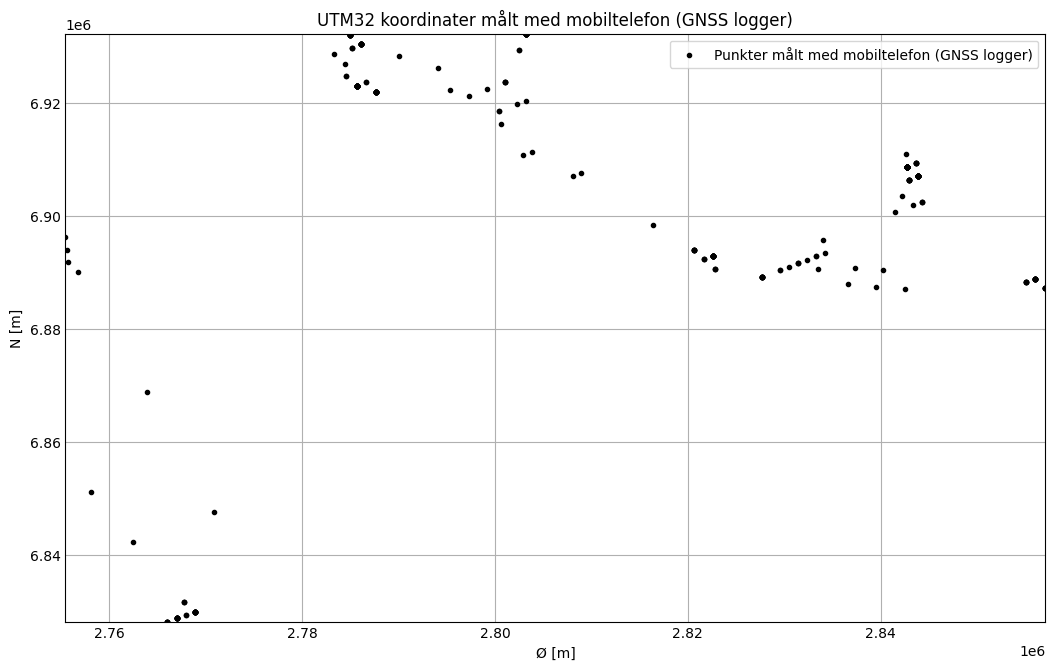

In [108]:
# Assuming you have these functions implemented
# mobile_coordinates = convert_to_utm32(extract_coordinates_kml_mobil('trygve_data.kml'))
# rtk_coordinates = convert_to_utm32(extract_coordinates_kml_RTK('RTK.kml'))

test_mobile_coordinates = convert_to_utm32(extract_coordinates_nmea('test_nmea_gnss_log.nmea'))


long_mobt, lat_mobt = zip(*test_mobile_coordinates)

# Plotting
plt.figure(figsize=(10, 6))

# Variable to adjust the space around the points in the plot
space_value = 1

# Adjust axes based on data
plt.xlim(min(long_mobt) - space_value, max(long_mobt) + space_value)
plt.ylim(min(lat_mobt) - space_value, max(lat_mobt) + space_value)

plt.scatter(long_mobt, lat_mobt, c='black', marker='.', label='Punkter målt med mobiltelefon (GNSS logger)')

# Adding title and labels
plt.title('UTM32 koordinater målt med mobiltelefon (GNSS logger)')
plt.xlabel('Ø [m]')
plt.ylabel('N [m]')

# Optional: Add grid
plt.grid(True)

# Display the plot with a legend
plt.legend()
plt.show()